# Libraries and Fly Data

In [1]:
# import required librairies and dependencies
import pandas as pd
from os import listdir
from os import getcwd
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import glob
pd.set_option('display.max_columns',100)
%matplotlib inline

In [2]:
# Make Plotly work in our Jupyter Notebook
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [3]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Retrieve and display all asc files using glob function
from glob import glob
raw_data = glob('ontime*')

In [5]:
# Display and sort the list of files
raw_data.sort()
raw_data

['ontime.td.202201.asc',
 'ontime.td.202202.asc',
 'ontime.td.202203.asc',
 'ontime.td.202204.asc',
 'ontime.td.202205 (1).asc',
 'ontime.td.202206.asc',
 'ontime.td.202207.asc',
 'ontime.td.202208.asc',
 'ontime.td.202209.asc',
 'ontime.td.202210.asc']

In [6]:
# Merge all asc files into one airline file
airlinedf = pd.concat((pd.read_table(file, delimiter='|',header = None, low_memory = False, encoding='ISO-8859-1') for file in raw_data),ignore_index=True)
airlinedf.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,DL,3975,OO,3975.0,9E,5540,BNA,MSP,20220124,1,1445,1445,1521,1701,1701,1751,0,0,136,150,36,50,14,1532,1722,N902XJ,11,29,110,NaN,36,0,14,0,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,FORM-3A,N
1,DL,3714,OO,3714.0,9E,5539,STL,MSP,20220123,7,1121,1121,1153,1254,1254,1336,0,0,93,103,32,42,10,1207,1327,N153PQ,14,9,80,NaN,0,0,10,0,32,0,0,0,0,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,FORM-3A,N


In [7]:
# Read the html page that contains features titles
columns_labels = pd.read_html('https://esubmit.rita.dot.gov/On-Time-Form3A.aspx')[3]
columns_labels

,Field,Field Description,Data Type,Length,Comments
0,A1,Marketing Carrier code,Character,2,Two letter IATA code
1,B1,Marketing Carrier Flight number,Character,Max length of 4,NaN
2,A2,Scheduled Operating Carrier Code,Character,2,Two letter IATA code
3,B2,Scheduled Operating Carrier Flight number,Character,Max length of 4,NaN
4,A3,Actual Operating Carrier Code,Character,2,Two letter IATA code
...,...,...,...,...,...
61,BF,Wheels-on time at diverted airport,Num,4,Local time 24 hour clock
62,BG,Total ground time away from gate at diverted a...,Num,Max length of 4,In minutes
63,BH,Longest ground time away from gate at diverted...,Num,Max length of 4,In minutes
64,BI,Wheels-off time (actual) at diverted airport,Num,4,Local time 24 hour clock


# Data Wrangling 

In [8]:
# Drop some columns
airline_df = airlinedf.drop(columns=[2,3,4,5,11,14,16,17,26,27,28,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70],axis=1)
airline_df.head(2)

,0,1,6,7,8,9,10,12,13,15,18,19,20,21,22,23,24,25,29,30,31,32,33,34,35,36,37,38
0,DL,3975,BNA,MSP,20220124,1,1445,1521,1701,1751,136,150,36,50,14,1532,1722,N902XJ,NaN,36,0,14,0,0,0,0,0,0
1,DL,3714,STL,MSP,20220123,7,1121,1153,1254,1336,93,103,32,42,10,1207,1327,N153PQ,NaN,0,0,10,0,32,0,0,0,0


In [9]:
# Reindex columns
columns=[]
for i in range(28):
    columns.append(i)
airline_df.columns = columns
airline_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,DL,3975,BNA,MSP,20220124,1,1445,1521,1701,1751,136,150,36,50,14,1532,1722,N902XJ,NaN,36,0,14,0,0,0,0,0,0
1,DL,3714,STL,MSP,20220123,7,1121,1153,1254,1336,93,103,32,42,10,1207,1327,N153PQ,NaN,0,0,10,0,32,0,0,0,0


In [10]:
# airline_df's Size 
print("Columns and Rows: \n", airline_df.shape)

Columns and Rows: 
 (5867108, 28)


In [11]:
# Read feature titles
headers = pd.read_csv('headers_mapping.csv').to_dict()['Field']
headers

{0: 'Mkt_Ccode',
 1: 'Mkt_Fl_No',
 2: 'Dep_Airport',
 3: 'Arr_Airport',
 4: 'Date',
 5: 'Day_Week',
 6: 'Sched_Dep_Time_OAG',
 7: 'Gate_Dep_Time_Actual',
 8: 'Sched_Arr_Time_OAG',
 9: 'Gate_Arr_Time_Actual',
 10: 'Sched_Elapsed_Time_CRS',
 11: 'Actual_Gate_Gate_Time',
 12: 'Dep_Delay_Time_Actual',
 13: 'Arr_Delay_Time_Actual',
 14: 'Elapsed_Time_Diff_Actual',
 15: 'Wheels_Off_Time_Actual',
 16: 'Wheels_On_Time_Actual',
 17: 'Tail_Number',
 18: 'Cancel_Code',
 19: 'Mins_Late_Delay_Code_E_Carrier',
 20: 'Mins_Late_Delay_Code_F_Weather',
 21: 'Mins_Late_Delay_Code_G_NAS',
 22: 'Mins_Late_Delay_Code_H_Security',
 23: 'Mins_Late_Delay_Code_I_Late_Arr_Flight',
 24: 'First_Gate_Dep_Time',
 25: 'Total_Ground_Away_From_Gate',
 26: 'Longest_Ground_Time_Away_From_Gate',
 27: 'No_Landings_At_Div_Airport'}

In [12]:
# Rename airline_df columns 
airline_df1 = airline_df.rename(headers, axis=1) 
airline_df1.head(2)

,Mkt_Ccode,Mkt_Fl_No,Dep_Airport,Arr_Airport,Date,Day_Week,Sched_Dep_Time_OAG,Gate_Dep_Time_Actual,Sched_Arr_Time_OAG,Gate_Arr_Time_Actual,Sched_Elapsed_Time_CRS,Actual_Gate_Gate_Time,Dep_Delay_Time_Actual,Arr_Delay_Time_Actual,Elapsed_Time_Diff_Actual,Wheels_Off_Time_Actual,Wheels_On_Time_Actual,Tail_Number,Cancel_Code,Mins_Late_Delay_Code_E_Carrier,Mins_Late_Delay_Code_F_Weather,Mins_Late_Delay_Code_G_NAS,Mins_Late_Delay_Code_H_Security,Mins_Late_Delay_Code_I_Late_Arr_Flight,First_Gate_Dep_Time,Total_Ground_Away_From_Gate,Longest_Ground_Time_Away_From_Gate,No_Landings_At_Div_Airport
0,DL,3975,BNA,MSP,20220124,1,1445,1521,1701,1751,136,150,36,50,14,1532,1722,N902XJ,NaN,36,0,14,0,0,0,0,0,0
1,DL,3714,STL,MSP,20220123,7,1121,1153,1254,1336,93,103,32,42,10,1207,1327,N153PQ,NaN,0,0,10,0,32,0,0,0,0


In [13]:
# Dataset Overview
print("General Information: \n")
airline_df1.info()

General Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867108 entries, 0 to 5867107
Data columns (total 28 columns):
 #   Column                                  Dtype 
---  ------                                  ----- 
 0   Mkt_Ccode                               object
 1   Mkt_Fl_No                               int64 
 2   Dep_Airport                             object
 3   Arr_Airport                             object
 4   Date                                    int64 
 5   Day_Week                                int64 
 6   Sched_Dep_Time_OAG                      int64 
 7   Gate_Dep_Time_Actual                    int64 
 8   Sched_Arr_Time_OAG                      int64 
 9   Gate_Arr_Time_Actual                    int64 
 10  Sched_Elapsed_Time_CRS                  int64 
 11  Actual_Gate_Gate_Time                   int64 
 12  Dep_Delay_Time_Actual                   int64 
 13  Arr_Delay_Time_Actual                   int64 
 14  Elapsed_Time_Diff_Actual   

In [14]:
# Convert feature titles from upper to lower case 
airline_df1.columns = airline_df1.columns.str.lower()
airline_df1.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,arr_airport,date,day_week,sched_dep_time_oag,gate_dep_time_actual,sched_arr_time_oag,gate_arr_time_actual,sched_elapsed_time_crs,actual_gate_gate_time,dep_delay_time_actual,arr_delay_time_actual,elapsed_time_diff_actual,wheels_off_time_actual,wheels_on_time_actual,tail_number,cancel_code,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,first_gate_dep_time,total_ground_away_from_gate,longest_ground_time_away_from_gate,no_landings_at_div_airport
0,DL,3975,BNA,MSP,20220124,1,1445,1521,1701,1751,136,150,36,50,14,1532,1722,N902XJ,NaN,36,0,14,0,0,0,0,0,0
1,DL,3714,STL,MSP,20220123,7,1121,1153,1254,1336,93,103,32,42,10,1207,1327,N153PQ,NaN,0,0,10,0,32,0,0,0,0


In [15]:
# Display all feature names
airline_df1.columns 

Index(['mkt_ccode', 'mkt_fl_no', 'dep_airport', 'arr_airport', 'date',
       'day_week', 'sched_dep_time_oag', 'gate_dep_time_actual',
       'sched_arr_time_oag', 'gate_arr_time_actual', 'sched_elapsed_time_crs',
       'actual_gate_gate_time', 'dep_delay_time_actual',
       'arr_delay_time_actual', 'elapsed_time_diff_actual',
       'wheels_off_time_actual', 'wheels_on_time_actual', 'tail_number',
       'cancel_code', 'mins_late_delay_code_e_carrier',
       'mins_late_delay_code_f_weather', 'mins_late_delay_code_g_nas',
       'mins_late_delay_code_h_security',
       'mins_late_delay_code_i_late_arr_flight', 'first_gate_dep_time',
       'total_ground_away_from_gate', 'longest_ground_time_away_from_gate',
       'no_landings_at_div_airport'],
      dtype='object')

In [16]:
# Select features to use in the data analysis process 
airline_data = airline_df1[['mkt_ccode', 'mkt_fl_no', 'dep_airport', 'cancel_code' ,'arr_airport', 'date',
       'day_week','dep_delay_time_actual','arr_delay_time_actual','mins_late_delay_code_e_carrier',
       'mins_late_delay_code_f_weather', 'mins_late_delay_code_g_nas','mins_late_delay_code_h_security','mins_late_delay_code_i_late_arr_flight']]

airline_data.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,cancel_code,arr_airport,date,day_week,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight
0,DL,3975,BNA,NaN,MSP,20220124,1,36,50,36,0,14,0,0
1,DL,3714,STL,NaN,MSP,20220123,7,32,42,0,0,10,0,32


In [17]:
# Different options for Cancel Code
airline_data['cancel_code'].value_counts()

B    83859
A    53206
C    14622
D      152
Name: cancel_code, dtype: int64

In [18]:
# Find and drop columns that contain only 0 as value
airline_data1 = (airline_data !=0).any(axis=0) # Retrieve column that has nonzero entries
airline_data1

mkt_ccode                                 True
mkt_fl_no                                 True
dep_airport                               True
cancel_code                               True
arr_airport                               True
date                                      True
day_week                                  True
dep_delay_time_actual                     True
arr_delay_time_actual                     True
mins_late_delay_code_e_carrier            True
mins_late_delay_code_f_weather            True
mins_late_delay_code_g_nas                True
mins_late_delay_code_h_security           True
mins_late_delay_code_i_late_arr_flight    True
dtype: bool

In [19]:
# Convert date feature from integer to object 
airline_data['date'] = airline_data.loc[:,'date'].astype(object)

In [20]:
airline_data.head(1)

,mkt_ccode,mkt_fl_no,dep_airport,cancel_code,arr_airport,date,day_week,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight
0,DL,3975,BNA,NaN,MSP,20220124,1,36,50,36,0,14,0,0


In [21]:
# dtypes of dataframe column 
airline_data.dtypes

mkt_ccode                                 object
mkt_fl_no                                  int64
dep_airport                               object
cancel_code                               object
arr_airport                               object
date                                      object
day_week                                   int64
dep_delay_time_actual                      int64
arr_delay_time_actual                      int64
mins_late_delay_code_e_carrier             int64
mins_late_delay_code_f_weather             int64
mins_late_delay_code_g_nas                 int64
mins_late_delay_code_h_security            int64
mins_late_delay_code_i_late_arr_flight     int64
dtype: object

In [22]:
# feature data types total number 
pd.value_counts(airline_data.dtypes)

int64     9
object    5
dtype: int64

In [23]:
# Check number of duplicates 
n_duplicates = airline_data.duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


## Handling Missing Data

In [24]:
# Determine the total number of missing data for each feature
airline_data.isna().sum().to_frame().rename(columns={0:'total_number_NA'})

,total_number_NA
mkt_ccode,0
mkt_fl_no,0
dep_airport,0
cancel_code,5715269
arr_airport,0
date,0
day_week,0
dep_delay_time_actual,0
arr_delay_time_actual,0
mins_late_delay_code_e_carrier,0


### The cancel code feature has a missing data rate of over 97%. Since this feature is not useful for predicting flight delays, we will not use it for modeling. We do not need to handle the missing values in this feature and will only use it for data visualization.

In [25]:
# Create a csv file with dep_airport
airline_data['dep_airport'].unique() 

array(['BNA', 'STL', 'IAD', 'ALB', 'MSP', 'DTW', 'SCE', 'SYR', 'ORD',
       'IND', 'LGA', 'XNA', 'JFK', 'MKE', 'ORF', 'ATL', 'HPN', 'ICT',
       'VPS', 'CVG', 'BOS', 'EWR', 'TLH', 'TYS', 'MLI', 'MEM', 'BGR',
       'CHO', 'BTV', 'ABE', 'BTR', 'BQK', 'RDU', 'SHV', 'CHS', 'MYR',
       'AUS', 'ILM', 'LFT', 'SBN', 'FSD', 'LEX', 'DSM', 'DAY', 'GRB',
       'CRW', 'SAV', 'BIS', 'BUF', 'CLT', 'GRR', 'JAN', 'CMH', 'TRI',
       'ROC', 'OAJ', 'ECP', 'MOB', 'CID', 'MIA', 'RIC', 'MSN', 'DLH',
       'EVV', 'AGS', 'PWM', 'MDW', 'PIT', 'DCA', 'ATW', 'LAN', 'CHA',
       'HSV', 'CLE', 'GSO', 'PVD', 'GFK', 'GPT', 'PHL', 'GSP', 'AZO',
       'ABY', 'DHN', 'MBS', 'MOT', 'SGF', 'CAE', 'VLD', 'MDT', 'EYW',
       'GNV', 'AEX', 'SDF', 'MLU', 'TVC', 'BHM', 'RST', 'GTR', 'BWI',
       'MGM', 'CWA', 'CSG', 'AVL', 'BMI', 'FWA', 'ROA', 'FAY', 'ITH',
       'TUL', 'BGM', 'FAR', 'ORH', 'DFW', 'LAX', 'OGG', 'HNL', 'SFO',
       'KOA', 'SJU', 'LIH', 'STT', 'PHX', 'SAN', 'AMA', 'IAH', 'BDL',
       'MCO', 'SNA',

In [26]:
# Summary Statistics
airline_data.describe() 

,mkt_fl_no,day_week,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight
count,5.867108e+06,5.867108e+06,5.867108e+06,5.867108e+06,5.867108e+06,5.867108e+06,5.867108e+06,5.867108e+06,5.867108e+06
mean,2.529752e+03,3.986479e+00,1.186616e+01,6.924219e+00,5.361069e+00,7.365389e-01,2.299605e+00,2.862569e-02,5.060863e+00
std,1.730411e+03,2.009075e+00,5.145108e+01,5.552709e+01,3.523961e+01,1.337730e+01,1.411219e+01,1.722585e+00,2.668803e+01
min,1.000000e+00,1.000000e+00,-9.600000e+01,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.097000e+03,2.000000e+00,-5.000000e+00,-1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.202000e+03,4.000000e+00,-1.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.814000e+03,6.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.680000e+03,7.000000e+00,7.223000e+03,7.232000e+03,7.232000e+03,2.363000e+03,1.740000e+03,1.245000e+03,2.302000e+03


## Data Engeenering

In [27]:
# Convert yyyymmdd date format to yyyy-mm-dd  
from datetime import datetime
airline_data['date'] = airline_data.loc[:,'date'].astype(str) # convert date as object data type

airline_data['date'] = airline_data.loc[:,'date'].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:8]}") # split yyyymmdd into yyyy-mm-dd

In [28]:
# display airline dataframe
airline_data.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,cancel_code,arr_airport,date,day_week,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight
0,DL,3975,BNA,NaN,MSP,2022-01-24,1,36,50,36,0,14,0,0
1,DL,3714,STL,NaN,MSP,2022-01-23,7,32,42,0,0,10,0,32


In [29]:

# convert the date column to datetime format
airline_data.loc[:,'date'] = pd.to_datetime(airline_data.loc[:,'date'])

# extract the month and store it in a new column
airline_data['month'] = airline_data.loc[:,'date'].dt.month

# print dataframe 
airline_data.head(3)

,mkt_ccode,mkt_fl_no,dep_airport,cancel_code,arr_airport,date,day_week,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,month
0,DL,3975,BNA,NaN,MSP,2022-01-24,1,36,50,36,0,14,0,0,1
1,DL,3714,STL,NaN,MSP,2022-01-23,7,32,42,0,0,10,0,32,1
2,DL,3855,IAD,NaN,DTW,2022-01-21,5,-3,11,0,0,0,0,0,1


In [30]:
# Use dt.strftime to format the date column as abbreviated day string
airline_data['day_week_name'] = airline_data.loc[:,'date'].dt.strftime('%a')
airline_data.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,cancel_code,arr_airport,date,day_week,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,month,day_week_name
0,DL,3975,BNA,NaN,MSP,2022-01-24,1,36,50,36,0,14,0,0,1,Mon
1,DL,3714,STL,NaN,MSP,2022-01-23,7,32,42,0,0,10,0,32,1,Sun


In [31]:
# Use dt.strftime to format the date column as abbreviated month string
airline_data['month__name'] = airline_data.loc[:,'date'].dt.strftime('%b')
airline_data.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,cancel_code,arr_airport,date,day_week,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,month,day_week_name,month__name
0,DL,3975,BNA,NaN,MSP,2022-01-24,1,36,50,36,0,14,0,0,1,Mon,Jan
1,DL,3714,STL,NaN,MSP,2022-01-23,7,32,42,0,0,10,0,32,1,Sun,Jan


In [32]:
# drop month and day_week
airline_data1 = airline_data.drop(['month','day_week'], axis=1)
airline_data1.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,cancel_code,arr_airport,date,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,day_week_name,month__name
0,DL,3975,BNA,NaN,MSP,2022-01-24,36,50,36,0,14,0,0,Mon,Jan
1,DL,3714,STL,NaN,MSP,2022-01-23,32,42,0,0,10,0,32,Sun,Jan


In [33]:
# airline_data1 feature data type
airline_data1.dtypes

mkt_ccode                                         object
mkt_fl_no                                          int64
dep_airport                                       object
cancel_code                                       object
arr_airport                                       object
date                                      datetime64[ns]
dep_delay_time_actual                              int64
arr_delay_time_actual                              int64
mins_late_delay_code_e_carrier                     int64
mins_late_delay_code_f_weather                     int64
mins_late_delay_code_g_nas                         int64
mins_late_delay_code_h_security                    int64
mins_late_delay_code_i_late_arr_flight             int64
day_week_name                                     object
month__name                                       object
dtype: object

In [34]:
# drop missing data
#airline_data2 = airline_data1.dropna()
#print(f"rows and columns: \n", airline_data2.shape)

In [35]:
# total number of each feature data type
#(airline_data1.dtypes).value_counts()
pd.value_counts(airline_data1.dtypes)

int64             8
object            6
datetime64[ns]    1
dtype: int64

## Handling Outliers for Numerical Data

In [36]:
# Split airline_data into categorical and numerical data types

Cat = ['object'] # columns that have categorical data type
num_features = airline_data1.select_dtypes(exclude=Cat) # Dataframe with only numerical data
num_features.head(3)

,mkt_fl_no,date,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight
0,3975,2022-01-24,36,50,36,0,14,0,0
1,3714,2022-01-23,32,42,0,0,10,0,32
2,3855,2022-01-21,-3,11,0,0,0,0,0


In [37]:
# categorical data type
cat_features = airline_data1.select_dtypes(include=Cat) 
cat_features.head(3)

,mkt_ccode,dep_airport,cancel_code,arr_airport,day_week_name,month__name
0,DL,BNA,NaN,MSP,Mon,Jan
1,DL,STL,NaN,MSP,Sun,Jan
2,DL,IAD,NaN,DTW,Fri,Jan


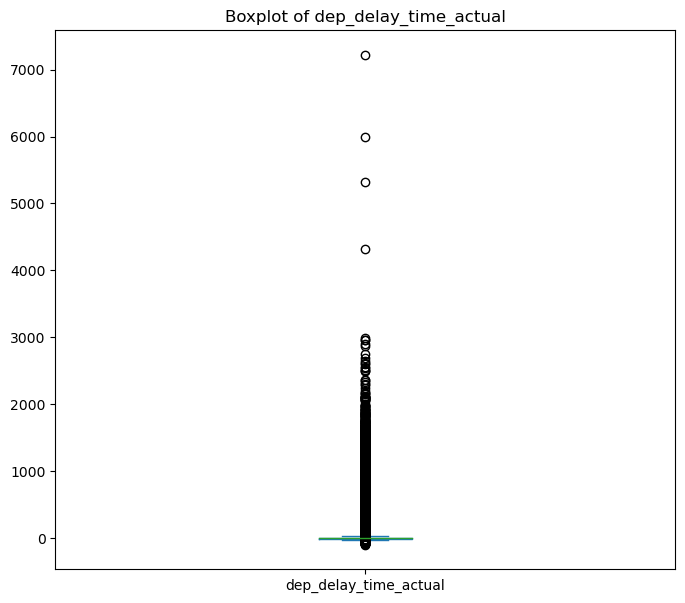

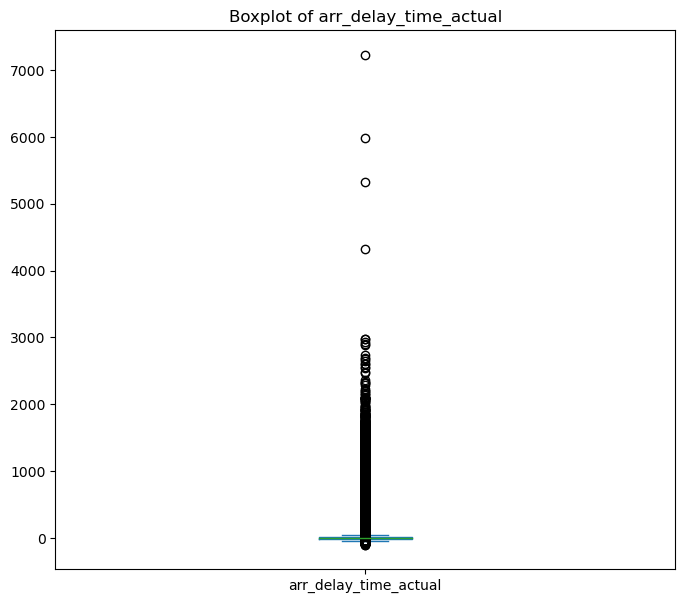

In [38]:
# Detect outliers from numerical columns using boxplot 
new_feat = num_features[['dep_delay_time_actual','arr_delay_time_actual']]
new_columns = new_feat.columns
for column in new_columns:
    plt.figure(figsize=(8,7))
    ax = new_feat [column].plot(kind='box', title= f'Boxplot of {column}') 

In [39]:
# Discover the outliers in the data by using three standard deviations
new_feat = num_features[['dep_delay_time_actual','arr_delay_time_actual']]
columns = new_feat.columns
for column in columns:
    min_val = new_feat[column].mean() - (3 * new_feat[column].std()) # compute the minimum value
    max_val = new_feat[column].mean() + (3 * new_feat[column].std()) # compute the maximum value
    outliers = new_feat [(new_feat[column] > max_val) | (new_feat[column] < min_val)]
    print(f'The maximum value for {column} is:{max_val} \n')
    print(f'The minimum value for {column} is:{min_val} \n')
outliers.count()

The maximum value for dep_delay_time_actual is:166.21940354273391 

The minimum value for dep_delay_time_actual is:-142.48708056521247 

The maximum value for arr_delay_time_actual is:173.50549240938457 

The minimum value for arr_delay_time_actual is:-159.65705464413466 



dep_delay_time_actual    81439
arr_delay_time_actual    81439
dtype: int64

### The data rate of outliers in the arr_delay_time_actual and dep_delay_time_actual features is less than 1.5% of the dataset. We will remove these outliers when predicting flight delay, but keep them for data visualization purposes. To minimize their effect, we will use RobustScaler to scale the dataset..  

In [40]:
# Create road feature
cat_features['route'] = cat_features['dep_airport']+'-'+cat_features['arr_airport']
cat_features.head(4)

,mkt_ccode,dep_airport,cancel_code,arr_airport,day_week_name,month__name,route
0,DL,BNA,NaN,MSP,Mon,Jan,BNA-MSP
1,DL,STL,NaN,MSP,Sun,Jan,STL-MSP
2,DL,IAD,NaN,DTW,Fri,Jan,IAD-DTW
3,DL,ALB,NaN,DTW,Tue,Jan,ALB-DTW


In [41]:
# read airport geographic data 
airport_geo_df = pd.read_csv('airline_geo_df.csv')
airport_geo_df.head(3)

,dept_airport,latitude,longitude
0,ABE,40.6521,-75.4408
1,ABI,32.4113,-99.6819
2,ABQ,35.0402,-106.6092


In [42]:
# Create delay column
delay = [] # create a placeholder 
delay_values = num_features['arr_delay_time_actual'].to_list() # Create a list with delay values
for i in delay_values:
    if i <= 0:
        delay.append('0')
        
    else:
        delay.append('1')

num_features['delay'] = delay       
num_features.head(3)      

,mkt_fl_no,date,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,delay
0,3975,2022-01-24,36,50,36,0,14,0,0,1
1,3714,2022-01-23,32,42,0,0,10,0,32,1
2,3855,2022-01-21,-3,11,0,0,0,0,0,1


In [43]:
# Convert delay column to numeric data type
num_features['delay'] = pd.to_numeric(num_features['delay']) 

In [44]:
# total number of delay, do not need to resample the dataset
num_features['delay'].value_counts() 

0    3770314
1    2096794
Name: delay, dtype: int64

In [45]:
# Merge num_features cat_features
airline_final = pd.concat([cat_features,num_features],axis=1)
airline_final.head(3)

,mkt_ccode,dep_airport,cancel_code,arr_airport,day_week_name,month__name,route,mkt_fl_no,date,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,delay
0,DL,BNA,NaN,MSP,Mon,Jan,BNA-MSP,3975,2022-01-24,36,50,36,0,14,0,0,1
1,DL,STL,NaN,MSP,Sun,Jan,STL-MSP,3714,2022-01-23,32,42,0,0,10,0,32,1
2,DL,IAD,NaN,DTW,Fri,Jan,IAD-DTW,3855,2022-01-21,-3,11,0,0,0,0,0,1


In [46]:
# Fill NaN value with 0 for cancel code feature
airline_final['cancel_code'] = airline_final['cancel_code'].fillna(0)
airline_final['cancel_code'].value_counts() # cancel code values

0    5715269
B      83859
A      53206
C      14622
D        152
Name: cancel_code, dtype: int64

In [47]:
# Display unique airlines
airline_final['mkt_ccode'].unique() 

array(['DL', 'AA', 'AS', 'B6', 'UA', 'F9', 'G4', 'HA', 'NK', 'WN'],
      dtype=object)

In [48]:
# Save airline_final as csv file
airline_final.to_csv('airline_final')

# Data Vizualization 

### Which routes are most prone to delays?

In [49]:
import pandas as pd
import plotly.express as px

# Use your dataset as a DataFrame
df = airline_final

# Calculate the mean delay for each route
mean_route_delays = df.groupby('route')['arr_delay_time_actual'].mean().reset_index().round(3)

# Sort the routes by mean delay in descending order and select the top 10
top_delayed_routes = mean_route_delays.sort_values(by='arr_delay_time_actual', ascending=False).head(10)

# Create a bar chart using Plotly Express
fig = px.bar(top_delayed_routes, x='route', y='arr_delay_time_actual',color = 'route',title='Top 10 Routes with Highest Mean Delays')
fig.update_layout(xaxis_title='Route', yaxis_title='Mean Delay (minutes)')
fig.show()


### What are the primary causes of departure delay time?

In [50]:
import pandas as pd
import plotly.express as px

# Use your dataset as a DataFrame
df = airline_final

def generate_pie_chart(day):
    # Filter the dataset based on the given day
    filtered_df = df[df['day_week_name'] == day]

    # Calculate the mean delays for each cause and round to three decimal places
    causes = ['mins_late_delay_code_e_carrier', 'mins_late_delay_code_f_weather', 'mins_late_delay_code_g_nas', 'mins_late_delay_code_h_security', 'mins_late_delay_code_i_late_arr_flight']
    mean_delays = filtered_df[causes].mean().round(3)

    # Create a new DataFrame for the pie chart
    delay_data = pd.DataFrame({'cause': causes, 'mean_delays': mean_delays}).sort_values(by='mean_delays', ascending=False)

    # Create a pie chart using Plotly Express
    fig = px.pie(delay_data, values='mean_delays', names='cause', title=f'Primary Causes of Flight Delays (Mean Delays) on {day}')
    fig.show()

# Generate the pie chart for a specific day, e.g., 'Mon' for Monday
generate_pie_chart('Tue')


### Airports with the Highest Average Delays

In [51]:
import pandas as pd
import plotly.express as px

# Read the CSV file
df = pd.read_csv('airline_geo_df.csv')

# Add the 'average_delay' column to the DataFrame
df['average_delay'] = airline_final['arr_delay_time_actual']

# Sort the DataFrame by the 'average_delay' column
df1 = df.sort_values(by='average_delay', ascending=False).head(25)

# Create the map
fig = px.scatter_mapbox(df1,
                        lon=df1['longitude'],
                        lat=df1['latitude'],
                        zoom=1,
                        color=df1['dept_airport'],
                        size=df1['average_delay'],
                        title='Top 25 Airports with the Highest Average Delays')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r': 0, 't': 50, 'l': 0, 'b': 10})
fig.show()


### Arrival Delay Time by Airline Across the Months

In [52]:
import pandas as pd
import plotly.express as px

# Use the provided dataset as a DataFrame
df = airline_final

# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Group the dataset by month and mkt_ccode, and calculate the mean of arr_delay_time_actual
monthly_mean_delays = df.groupby([df['date'].dt.month_name(), 'mkt_ccode'])['arr_delay_time_actual'].mean().reset_index()

# Rename the columns for clarity
monthly_mean_delays.columns = ['month', 'mkt_ccode', 'mean_arr_delay']

# Create a custom mapping for the month names
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Sort the DataFrame according to the custom month mapping
monthly_mean_delays['month_order'] = monthly_mean_delays['month'].map(month_order)
monthly_mean_delays = monthly_mean_delays.sort_values(['month_order', 'mkt_ccode']).drop('month_order', axis=1)

# Define a custom color sequence
color_sequence = px.colors.qualitative.Pastel

# Create a line chart using Plotly Express with the custom color sequence
fig = px.line(monthly_mean_delays, x='month', y='mean_arr_delay', color='mkt_ccode', title='Arrival Delay Time by Month and Airline', color_discrete_sequence=color_sequence)
fig.update_layout(xaxis_title='Month', yaxis_title='Mean Arrival Delay Time (minutes)')
fig.show()


# Machine Learning Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = airline_final

df = pd.DataFrame(data)

# Preprocess the data
le = LabelEncoder()
df['mkt_ccode'] = le.fit_transform(df['mkt_ccode'])
df['dep_airport'] = le.fit_transform(df['dep_airport'])
df['month__name'] = le.fit_transform(df['month__name'])
df['day_week_name'] = le.fit_transform(df['day_week_name'])

# Split the data into training and testing sets
X = df.drop('delay', axis=1)
y = df['delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)
